In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('anomaly_data.csv')
df.describe()

,Unnamed: 0,X0,X1,y
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,4.803625,4.864670,0.200000
std,346.554469,3.037881,2.874442,0.400167
min,0.000000,-5.994687,-5.997739,0.000000
25%,299.750000,4.887776,4.872305,0.000000
50%,599.500000,5.746231,5.795118,0.000000
75%,899.250000,6.431836,6.417423,0.000000
max,1199.000000,8.595721,8.595193,1.000000


In [33]:
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.utils.example import visualize

In [34]:
X = df[['X0', 'X1']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
clf = KNN(n_neighbors=10, method='largest', metric='euclidean')
clf.fit(X_train)
y_test_scores = clf.decision_function(X_test)
y_test_pred = clf.predict(X_test)

In [36]:
roc_auc = roc_auc_score(y_test, y_test_scores)
avg_precision = average_precision_score(y_test, y_test_scores)

print(f'ROC-AUC Score: {roc_auc:.4f}')
print(f'Average Precision Score: {avg_precision:.4f}')

ROC-AUC Score: 0.9980
Average Precision Score: 0.9928


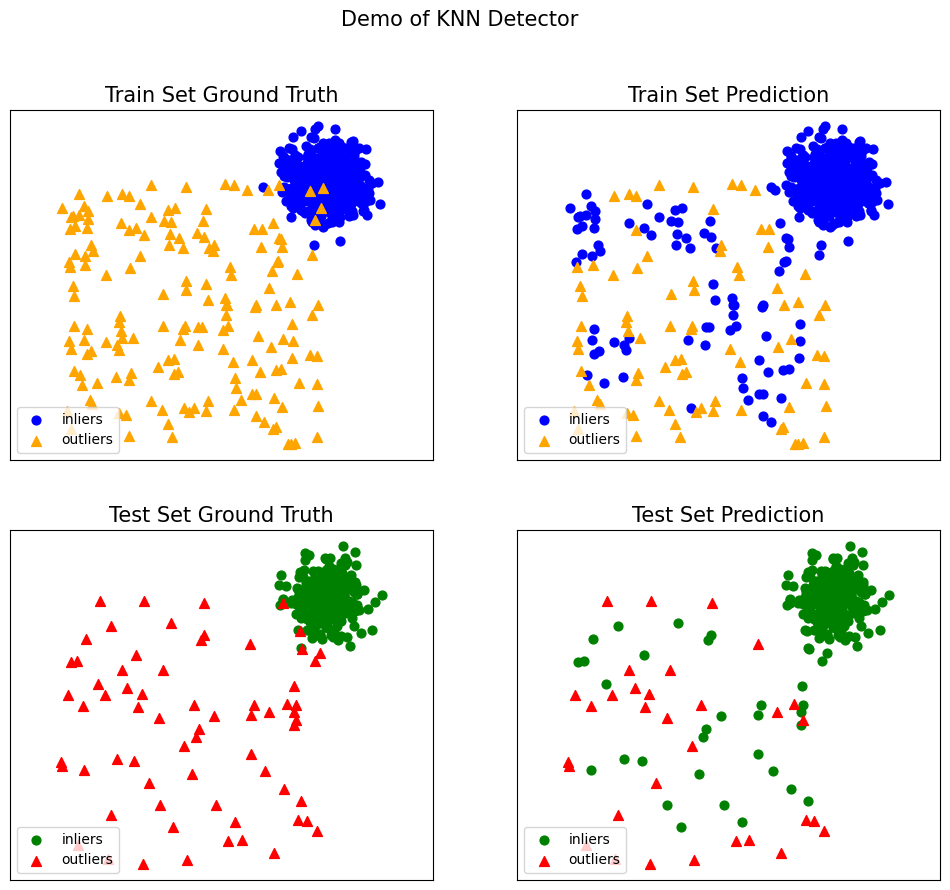

In [37]:
visualize('KNN', X_train, y_train, X_test, y_test, clf.labels_, y_test_pred, show_figure=True, save_figure=False)

In [38]:
n_neighbors_values = range(2, 22, 2)  
methods = ['largest', 'mean', 'median']

results = []

In [39]:
for n_neighbors in n_neighbors_values:
    for method in methods:
        clf = KNN(n_neighbors=n_neighbors, method=method, metric='euclidean')
        
        clf.fit(X_train)
        
        y_test_scores = clf.decision_function(X_test)  
        y_test_pred = clf.predict(X_test)  
        
        roc_auc = roc_auc_score(y_test, y_test_scores)
        avg_precision = average_precision_score(y_test, y_test_scores)
        
        results.append({
            'n_neighbors': n_neighbors,
            'method': method,
            'roc_auc': roc_auc,
            'average_precision': avg_precision
        })

results_df = pd.DataFrame(results)

In [40]:
best_roc_auc = results_df.loc[results_df['roc_auc'].idxmax()]

best_avg_precision = results_df.loc[results_df['average_precision'].idxmax()]

print("Best configuration based on ROC-AUC:")
print(best_roc_auc)

print("\nBest configuration based on Average Precision:")
print(best_avg_precision)

Best configuration based on ROC-AUC:
n_neighbors                16
method                largest
roc_auc              0.998472
average_precision    0.994368
Name: 21, dtype: object

Best configuration based on Average Precision:
n_neighbors                16
method                largest
roc_auc              0.998472
average_precision    0.994368
Name: 21, dtype: object


In [41]:
from pyod.models.lof import LOF

ROC-AUC Score: 0.4831
Average Precision Score: 0.2103


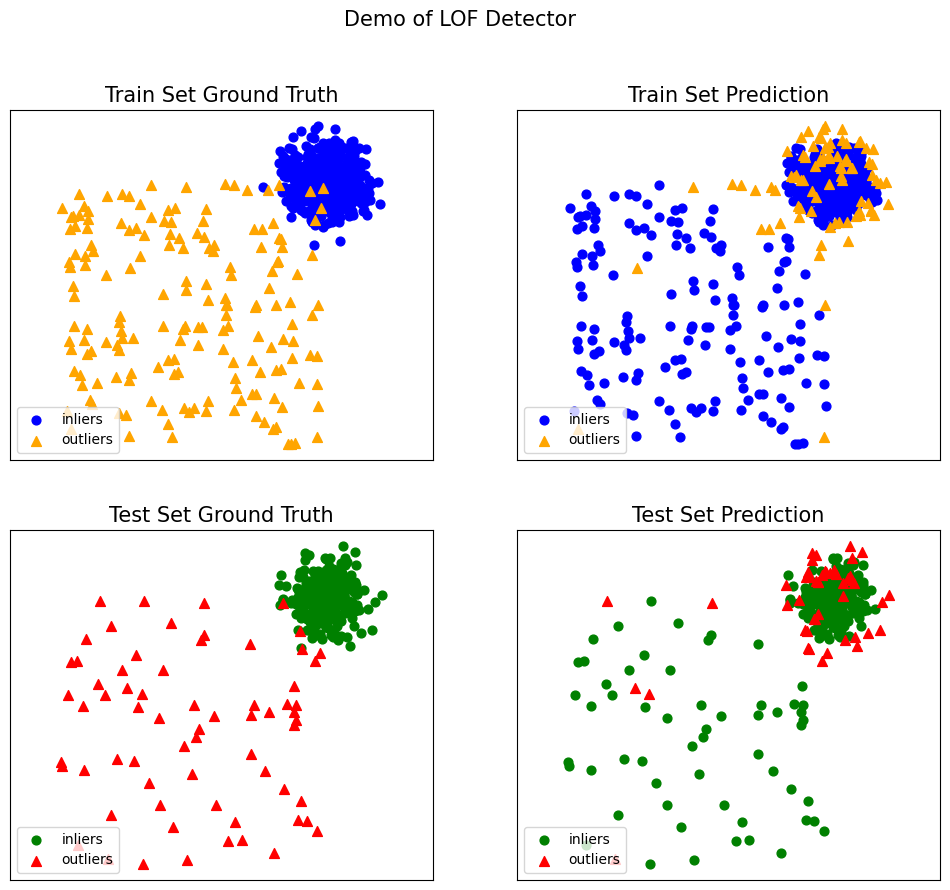

In [42]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.3, random_state=0)
clf = LOF(n_neighbors=10)
clf.fit(X_train_)
y_test_scores = clf.decision_function(X_test_)  
y_test_pred = clf.predict(X_test_)
roc_auc = roc_auc_score(y_test_, y_test_scores)
avg_precision = average_precision_score(y_test_, y_test_scores)

print(f'ROC-AUC Score: {roc_auc:.4f}')
print(f'Average Precision Score: {avg_precision:.4f}')
visualize('LOF', X_train_, y_train_, X_test_, y_test_, clf.labels_, y_test_pred, show_figure=True, save_figure=False)

In [43]:
n_neighbors_values = range(2, 22, 2)  

lof_results = []

for n_neighbors in n_neighbors_values:
    clf = LOF(n_neighbors=n_neighbors)
    clf.fit(X_train_)
    
    y_test_scores = clf.decision_function(X_test_) 
    y_test_pred = clf.predict(X_test_)
    
    roc_auc = roc_auc_score(y_test_, y_test_scores)
    avg_precision = average_precision_score(y_test_, y_test_scores)
    
    lof_results.append({
        'n_neighbors': n_neighbors,
        'roc_auc': roc_auc,
        'average_precision': avg_precision
    })

lof_results_df = pd.DataFrame(lof_results)

best_lof_roc_auc = lof_results_df.loc[lof_results_df['roc_auc'].idxmax()]
print("Best LOF configuration based on ROC-AUC:")
print(best_lof_roc_auc)

best_lof_avg_precision = lof_results_df.loc[lof_results_df['average_precision'].idxmax()]
print("\nBest LOF configuration based on Average Precision:")
print(best_lof_avg_precision)

Best LOF configuration based on ROC-AUC:
n_neighbors          8.000000
roc_auc              0.524935
average_precision    0.232370
Name: 3, dtype: float64

Best LOF configuration based on Average Precision:
n_neighbors          8.000000
roc_auc              0.524935
average_precision    0.232370
Name: 3, dtype: float64


In [44]:
print("Best KNN ROC-AUC Configuration: ", best_roc_auc)
print("Best KNN Average Precision Configuration: ", best_avg_precision)

print("\nBest LOF ROC-AUC Configuration: ", best_lof_roc_auc)
print("Best LOF Average Precision Configuration: ", best_lof_avg_precision)

Best KNN ROC-AUC Configuration:  n_neighbors                16
method                largest
roc_auc              0.998472
average_precision    0.994368
Name: 21, dtype: object
Best KNN Average Precision Configuration:  n_neighbors                16
method                largest
roc_auc              0.998472
average_precision    0.994368
Name: 21, dtype: object

Best LOF ROC-AUC Configuration:  n_neighbors          8.000000
roc_auc              0.524935
average_precision    0.232370
Name: 3, dtype: float64
Best LOF Average Precision Configuration:  n_neighbors          8.000000
roc_auc              0.524935
average_precision    0.232370
Name: 3, dtype: float64
